In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', (FutureWarning, ConvergenceWarning))
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from seaborn import heatmap
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

In [81]:
features = ["Age", "Workclass", "fnlwgt", "Education", "Education_Num", "Martial_Status", "Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_week", "Country", "Income"]
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
df_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?")
df_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?", skiprows=1)
df_train.drop(["fnlwgt", "Education"], axis = 1, inplace = True)
df_test.drop(["fnlwgt", "Education"], axis = 1, inplace = True)

In [82]:
df_train

,Age,Workclass,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [83]:
df_test

,Age,Workclass,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [84]:
X_train, y_train = df_train.drop('Income', axis = 1), df_train['Income']
X_test, y_test = df_test.drop('Income', axis = 1), df_test['Income'].replace('<=50K.', '<=50K').replace('>50K.', '<=50K')

In [85]:
y_train= y_train.astype('category').cat.codes

In [86]:
y_test = y_test.astype('category').cat.codes

In [87]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Length: 32561, dtype: int8

In [88]:
X_train.isnull()

,Age,Workclass,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
y_train.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [90]:
X_trainval, y_trainval = shuffle(X_train, y_train)

# 1

# Use "Income" as the classification target.

In [91]:
df_train["Income"]

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: Income, Length: 32561, dtype: object

# Determine which features are continuous vs categorical.

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   Education_Num   32561 non-null  int64 
 3   Martial_Status  32561 non-null  object
 4   Occupation      30718 non-null  object
 5   Relationship    32561 non-null  object
 6   Race            32561 non-null  object
 7   Sex             32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_per_week  32561 non-null  int64 
 11  Country         31978 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


In [93]:
categorical = X_train.dtypes == 'object'

In [94]:
categorical

Age               False
Workclass          True
Education_Num     False
Martial_Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_Gain      False
Capital_Loss      False
Hours_per_week    False
Country            True
dtype: bool

In [95]:
numerical =  X_train.dtypes == 'int64'

In [96]:
numerical 

Age                True
Workclass         False
Education_Num      True
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain       True
Capital_Loss       True
Hours_per_week     True
Country           False
dtype: bool

# PreProcessing and Pipeline

## ENCODING CATEGORICAL AND CONTINOUS DATA

In [97]:
from sklearn.compose import ColumnTransformer

numeric_features = ['Age', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features =  ['Workclass', 'Martial_Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Country']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [98]:
### kNN with scaling
pipe = make_pipeline(preprocessor, KNeighborsClassifier())
np.mean(cross_val_score(pipe, X_trainval, y_trainval))

0.8372901522602122

In [99]:
### Logistic reg with scaling
pipe = make_pipeline(preprocessor, LogisticRegression())
np.mean(cross_val_score(pipe, X_trainval, y_trainval))

0.8518166134184098

# 2

# Evaluate the Decision Tree model using cross-validation with the default parameters.

In [100]:
dt = DecisionTreeRegressor()

In [101]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [102]:
preprocess = make_column_transformer((StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical)) 
pipe = make_pipeline(preprocess, dt)
np.mean(cross_val_score(pipe, X_trainval, y_trainval))

0.05434401974738114

In [103]:
pipe.fit(X_trainval, y_trainval)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Age                True
Workclass         False
Education_Num      True
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain       True
Capital_Loss       True
Hours_per_week     True
Country           False
dtype: bool),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Age               False
Workclass          True
Education_Num     False
Martial_Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_Gain      False
Capital_Loss      False
Hours_per_week    False
Cou

# 3

# Tune the parameters of the models using GridSearchCV

In [104]:
param_grid = {'decisiontreeregressor__max_depth': range(2, 20, 2)}
grid1 = GridSearchCV(pipe, param_grid) 
grid1.fit(X_trainval, y_trainval)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Age                True
Workclass         False
Education_Num      True
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain       True
Capital_Loss       True
Hours_per_week     True
Country           False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Age               False
Workclass          True
Education_Num     False
Martial_Status     True
Occupation

In [105]:
np.mean(cross_val_score(grid1, X_trainval, y_trainval))

0.4487416543195639

In [106]:
grid1.best_params_

{'decisiontreeregressor__max_depth': 10}

In [107]:
# Validation Score
grid1.best_score_

0.4508096295207437

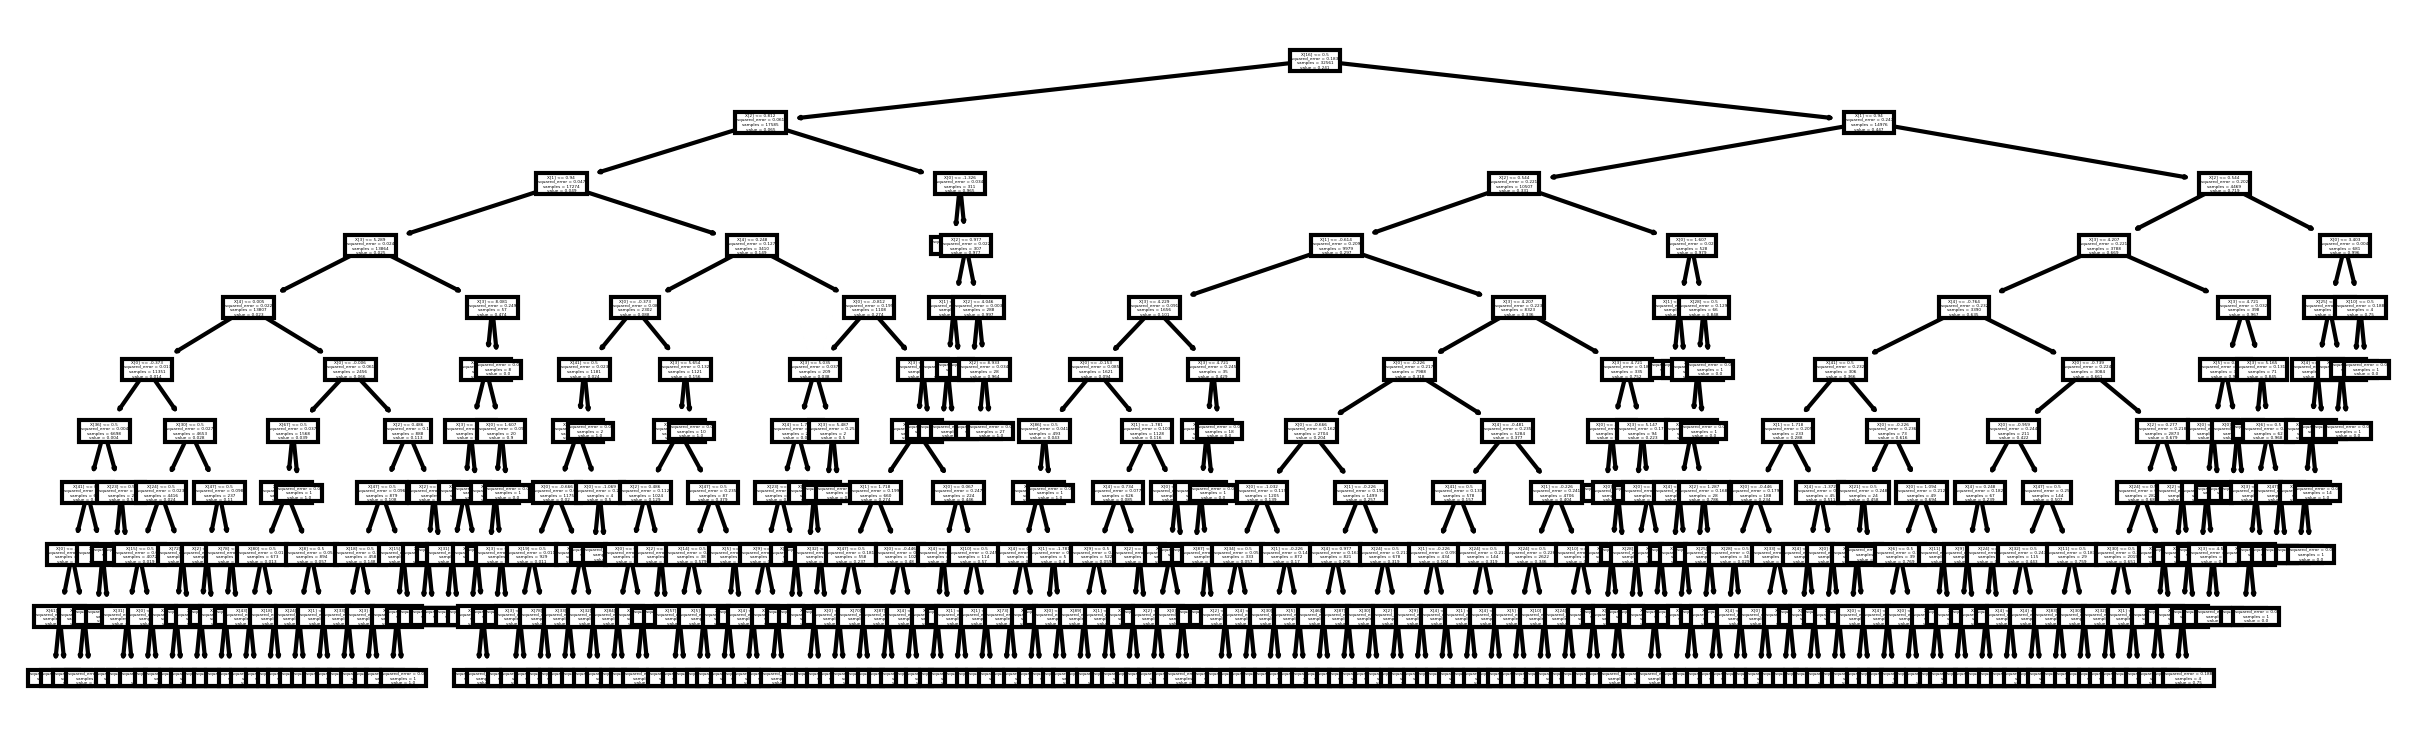

In [108]:
tree = grid1.best_estimator_.named_steps.decisiontreeregressor
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree)

In [109]:
# get importance
importance = tree.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05024
Feature: 1, Score: 0.21107
Feature: 2, Score: 0.19345
Feature: 3, Score: 0.06792
Feature: 4, Score: 0.03592
Feature: 5, Score: 0.00297
Feature: 6, Score: 0.00151
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00021
Feature: 9, Score: 0.00091
Feature: 10, Score: 0.00632
Feature: 11, Score: 0.00103
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00068
Feature: 15, Score: 0.00052
Feature: 16, Score: 0.38440
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00091
Feature: 19, Score: 0.00006
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00024
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00023
Feature: 24, Score: 0.01182
Feature: 25, Score: 0.00091
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00094
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00718
Feature: 31, Score: 0.00096
Feature: 32, Score: 0.00216
Feature: 33, Score: 0.00129
Feature: 34, Score: 0.00044
Feature: 35, Score: 0.00033
Fe

In [110]:
# top10 from default
top10_features_grid1= np.argsort(abs(xgb.feature_importances_))[-10:]
print(top10_features_grid1)

[20 25 89 34 28 23 19 87 88 11]


# After Answering the best grid in 8, I ran same code and tree structure from here. Also, took the top 10 features from here to compare with top 10 features in XGBOOST in 10 to avoid errors

# 4

# Visualize the dependence of the validation score on the parameter max_depth

In [31]:
results = pd.DataFrame(grid1.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_decisiontreeregressor__max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [32]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeregressor__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154716,0.002011,0.034099,0.001701,2,{'decisiontreeregressor__max_depth': 2},0.328410,0.318692,0.336168,0.311299,0.304248,0.319763,0.011466,8
1,0.206701,0.003075,0.034378,0.001654,4,{'decisiontreeregressor__max_depth': 4},0.407945,0.401344,0.409678,0.395754,0.384234,0.399791,0.009219,5
2,0.301047,0.007640,0.035195,0.001769,6,{'decisiontreeregressor__max_depth': 6},0.441419,0.436889,0.450356,0.433335,0.416112,0.435622,0.011298,3
3,0.453360,0.010260,0.034559,0.001847,8,{'decisiontreeregressor__max_depth': 8},0.456410,0.455539,0.466321,0.445831,0.432452,0.451311,0.011444,1
4,0.658684,0.019712,0.034621,0.002338,10,{'decisiontreeregressor__max_depth': 10},0.453880,0.447601,0.472541,0.436033,0.433657,0.448742,0.014023,2
5,0.905704,0.021036,0.052646,0.032196,12,{'decisiontreeregressor__max_depth': 12},0.444389,0.421459,0.436963,0.428222,0.407448,0.427696,0.012757,4
6,1.171831,0.033960,0.036076,0.001937,14,{'decisiontreeregressor__max_depth': 14},0.411139,0.396166,0.391938,0.380565,0.373879,0.390737,0.012921,6
7,1.428669,0.045363,0.035902,0.002754,16,{'decisiontreeregressor__max_depth': 16},0.362849,0.346158,0.356884,0.342147,0.328787,0.347365,0.011868,7
8,1.598378,0.052296,0.034497,0.001404,18,{'decisiontreeregressor__max_depth': 18},0.284151,0.308881,0.291037,0.278683,0.282929,0.289136,0.010641,9


<AxesSubplot:xlabel='param_decisiontreeregressor__max_depth'>

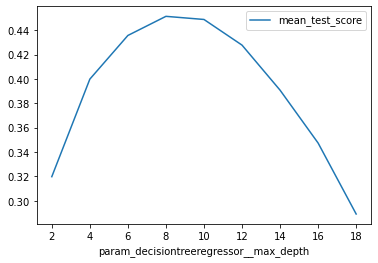

In [33]:
results.plot('param_decisiontreeregressor__max_depth', 'mean_test_score', logx = False)

# 5

# Tune the parameters of the models using GridSearchCV

In [34]:
dt = DecisionTreeRegressor()

In [35]:
preprocess = make_column_transformer((StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical)) 
pipe = make_pipeline(preprocess, dt)
np.mean(cross_val_score(pipe, X_trainval, y_trainval))

0.04340853383253236

In [36]:
param_grid = {'decisiontreeregressor__ccp_alpha': np.linspace(0., 0.03, 10) }
grid2 = GridSearchCV(pipe, param_grid) 
grid2.fit(X_trainval, y_trainval)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Age                True
Workclass         False
Education_Num      True
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain       True
Capital_Loss       True
Hours_per_week     True
Country           False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unkno...
Education_Num     False
Martial_Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_Gain      False
Capital_Loss      Fal

In [37]:
np.mean(cross_val_score(grid2, X_trainval, y_trainval))

0.3590048708315976

# Best parameter

In [38]:
grid2.best_params_

{'decisiontreeregressor__ccp_alpha': 0.003333333333333333}

# Best validation score

In [39]:
grid2.best_score_

0.3590048708315976

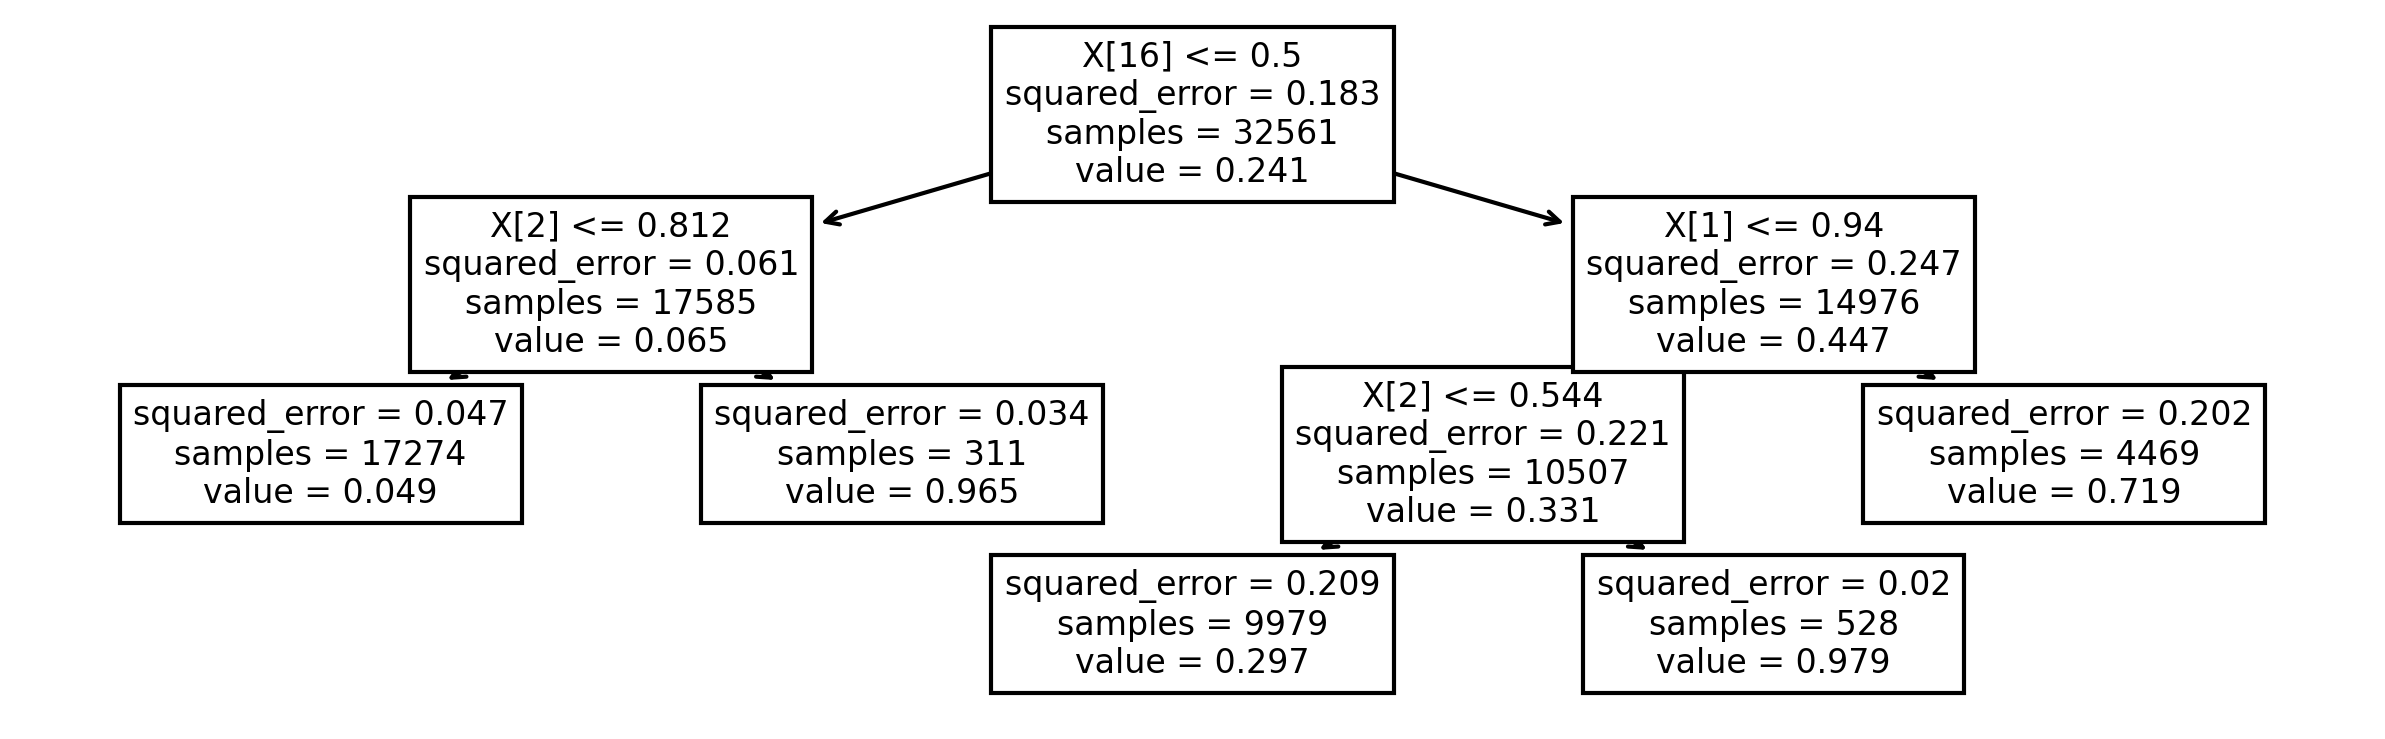

In [40]:
tree = grid2.best_estimator_.named_steps.decisiontreeregressor
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree)

# 6

# Visualize the dependence of the validation score on the parameter ccp_alpha.

In [41]:
results = pd.DataFrame(grid2.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_decisiontreeregressor__ccp_alpha', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

<AxesSubplot:xlabel='param_decisiontreeregressor__ccp_alpha'>

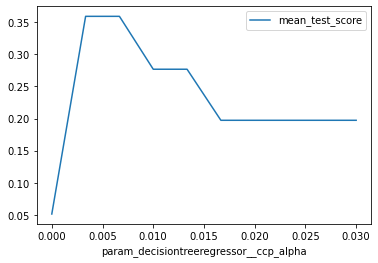

In [42]:
results.plot('param_decisiontreeregressor__ccp_alpha', 'mean_test_score', logx = False)

# 7

# Compare the best cross validation scores of the two grid searches.

In [43]:
best_param_grid1 = grid1.best_score_
print("best_param_grid1", best_param_grid1)

best_param_grid2 = grid2.best_score_
print("best_param_grid2", best_param_grid2)

best_param_grid1 0.4513106636607695
best_param_grid2 0.3590048708315976


In [44]:
cross_val_score_grid1 = cross_val_score(grid1, X_trainval, y_trainval)
print("cross_val_score_grid1 ", cross_val_score_grid1 )

cross_val_score_grid1  [0.45579543 0.45318505 0.4665309  0.44651409 0.43247596]


In [45]:
cross_val_score_grid2 = cross_val_score(grid2, X_trainval, y_trainval)
print("cross_val_score_grid1 ", cross_val_score_grid1 )

cross_val_score_grid1  [0.45579543 0.45318505 0.4665309  0.44651409 0.43247596]


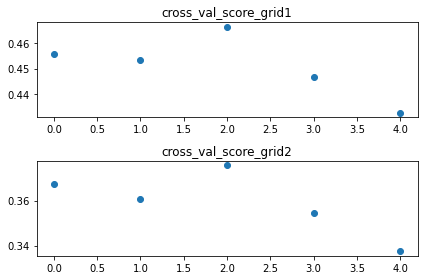

In [48]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title("cross_val_score_grid1")
ax[0].plot(cross_val_score_grid1, 'o')
ax[1].set_title("cross_val_score_grid2")
ax[1].plot(cross_val_score_grid2, 'o')

fig.tight_layout()

# Which model is better? 

# Answer: grid1

# What is the performance of the best tree model on the testing set?

In [49]:
grid1.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Age                True
Workclass         False
Education_Num      True
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain       True
Capital_Loss       True
Hours_per_week     True
Country           False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Age               False
Workclass          True
Education_Num     False
Martial_Status     True
Occupation

# 8

# Best Model's Tree structure

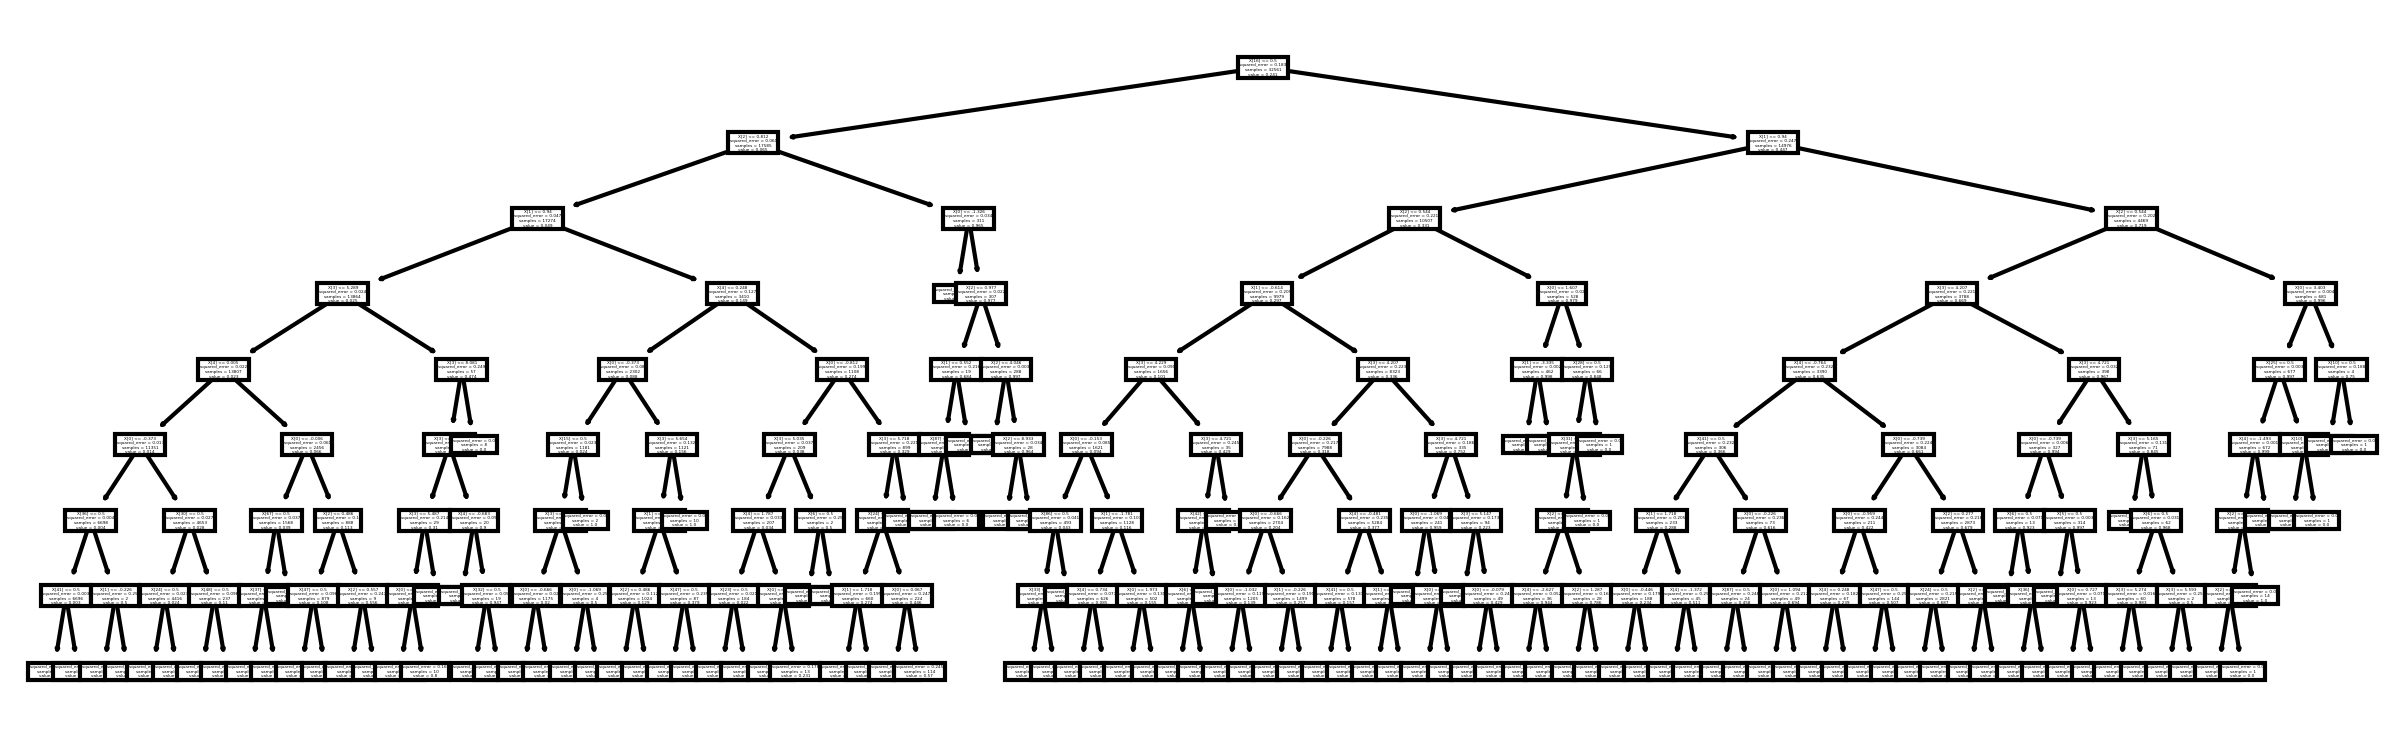

In [29]:
tree = grid1.best_estimator_.named_steps.decisiontreeregressor
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree)

In [30]:
# get importance
importance = tree.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04762
Feature: 1, Score: 0.22109
Feature: 2, Score: 0.20150
Feature: 3, Score: 0.06829
Feature: 4, Score: 0.03249
Feature: 5, Score: 0.00003
Feature: 6, Score: 0.00057
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00054
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00067
Feature: 16, Score: 0.41101
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.00539
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00026
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00058
Feature: 31, Score: 0.00026
Feature: 32, Score: 0.00010
Feature: 33, Score: 0.00023
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [72]:
# top10 from default
top10_features_grid1= np.argsort(abs(xgb.feature_importances_))[-10:]
print(top10_features_grid1)

[20 25 89 34 28 23 19 87 88 11]


# 9

# Use the same train test split.

In [52]:
X_train, y_train = df_train.drop('Income', axis = 1), df_train['Income']
X_test, y_test = df_test.drop('Income', axis = 1), df_test['Income'].replace('<=50K.', '<=50K').replace('>50K.', '<=50K')

# preprocessing

In [53]:
scaler = StandardScaler()
encoder = OneHotEncoder()
X_train_cat = X_train[X_train.columns[categorical]]
X_train_num = X_train[X_train.columns[~categorical]]
X_train_cat_trans = encoder.fit_transform(X_train_cat).toarray()
X_train_num_trans = scaler.fit_transform(X_train_num)
X_train_trans = np.concatenate((X_train_cat_trans, X_train_num_trans), axis = 1)

In [54]:
y_train= y_train.astype('category').cat.codes

In [55]:
scaler = StandardScaler()
encoder = OneHotEncoder()
X_test_cat = X_test[X_test.columns[categorical]]
X_test_num = X_test[X_test.columns[~categorical]]
X_test_cat_trans = encoder.fit_transform(X_test_cat).toarray()
X_test_num_trans = scaler.fit_transform(X_test_num)
X_test_trans = np.concatenate((X_test_cat_trans, X_test_num_trans), axis = 1)

In [56]:
y_test= y_test.astype('category').cat.codes

In [57]:
import os
import graphviz
from xgboost import XGBClassifier
from xgboost import plot_tree

# the training set to train a Gradient Boosting model with the default parameters

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_trans, y_train)

C:\Users\tamim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
np.mean(cross_val_score(xgb, X_train_trans, y_train))

C:\Users\tamim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\tamim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\tamim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\tamim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\tamim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8727927814754162

# What is the model’s performance on the testing set?

In [111]:
xgb.fit(X_test_trans, y_test)

C:\Users\tamim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

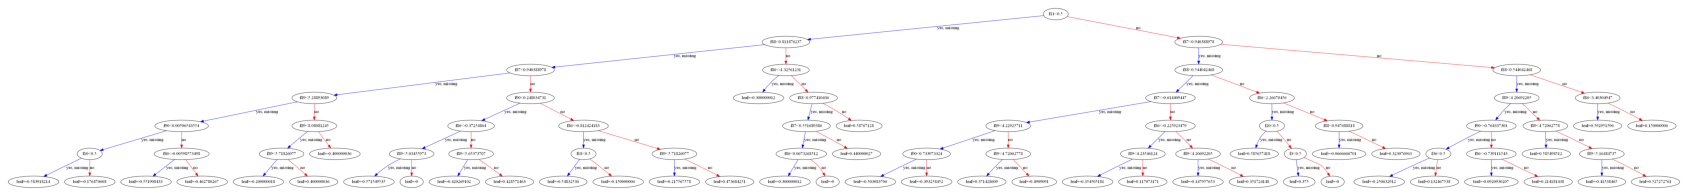

In [61]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb, num_trees=0, ax=ax)
plt.show()

# 10. 

# Compare the top 10 important features of decision tree and gradient boosting. How much do they agree?

# Get important features from XGBoost Model

In [62]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.01160
Feature: 1, Score: 0.00696
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00353
Feature: 4, Score: 0.00616
Feature: 5, Score: 0.00893
Feature: 6, Score: 0.00492
Feature: 7, Score: 0.00171
Feature: 8, Score: 0.00236
Feature: 9, Score: 0.00250
Feature: 10, Score: 0.00616
Feature: 11, Score: 0.47377
Feature: 12, Score: 0.00323
Feature: 13, Score: 0.01070
Feature: 14, Score: 0.00415
Feature: 15, Score: 0.00703
Feature: 16, Score: 0.00632
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00288
Feature: 19, Score: 0.02498
Feature: 20, Score: 0.01526
Feature: 21, Score: 0.01177
Feature: 22, Score: 0.00818
Feature: 23, Score: 0.02454
Feature: 24, Score: 0.00358
Feature: 25, Score: 0.01631
Feature: 26, Score: 0.00619
Feature: 27, Score: 0.00699
Feature: 28, Score: 0.02235
Feature: 29, Score: 0.00448
Feature: 30, Score: 0.00660
Feature: 31, Score: 0.00291
Feature: 32, Score: 0.00702
Feature: 33, Score: 0.00606
Feature: 34, Score: 0.02193
Feature: 35, Score: 0.00414
Fe

In [69]:
# top10 from default
top10_features_xgb = np.argsort(abs(xgb.feature_importances_))[-10:]
print(top10_features_xgb)

[20 25 89 34 28 23 19 87 88 11]


In [73]:
top10_features_grid1

array([20, 25, 89, 34, 28, 23, 19, 87, 88, 11], dtype=int64)

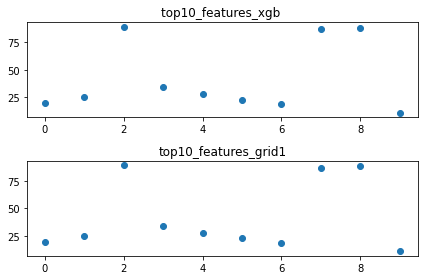

In [76]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title("top10_features_xgb ")
ax[0].plot(top10_features_xgb , 'o')
ax[1].set_title("top10_features_grid1")
ax[1].plot(top10_features_grid1, 'o')

fig.tight_layout()

# How much do they agree?

Completely Similar